**Loading Python Libraries and Breast Cancer Dataset**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importing breast cancer data from Sklearn library

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

**Visualising the Dataset**

In [53]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data['target'] = pd.Series(cancer.target)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**A quick look at the variables**

In [54]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**Visualise the rellationship between the variables**

- 1 = Orange, Benign (No Cancer)
- 2 = Blue, Malignant (Cancer)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

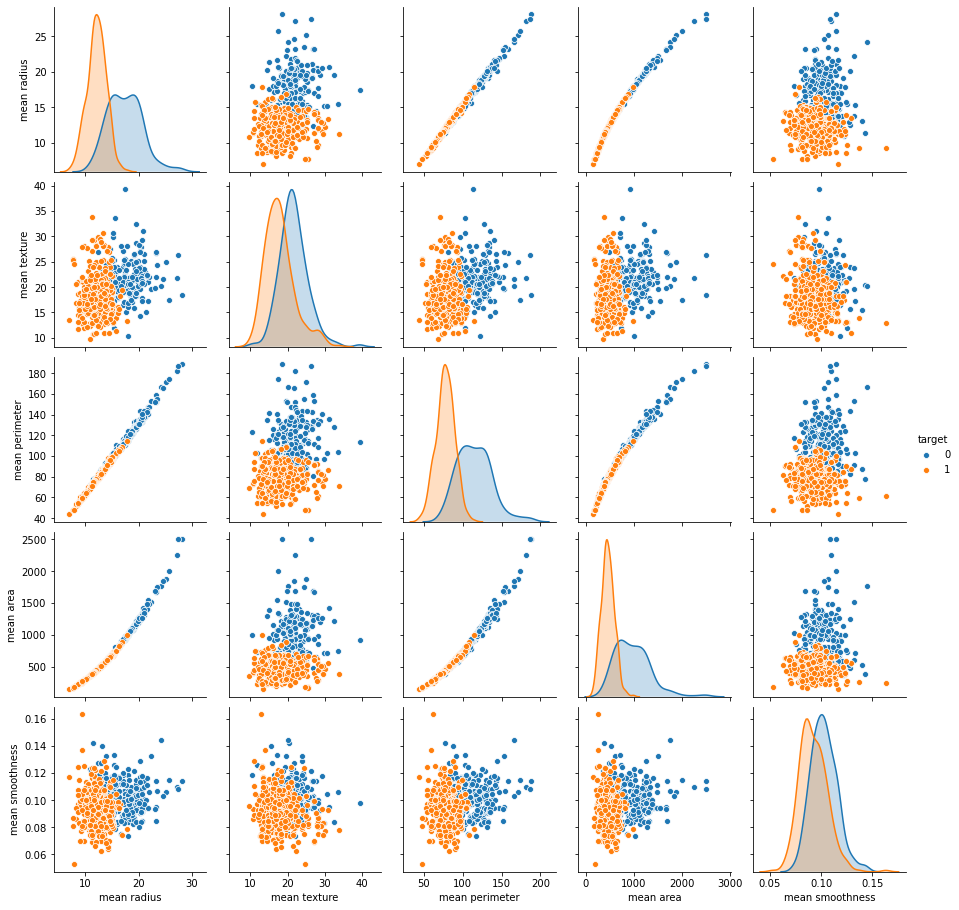

In [56]:
#Visualising the relationship of first 5 variables


sns.pairplot(data, hue = 'target', vars = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

**Checking the correlation between the features**

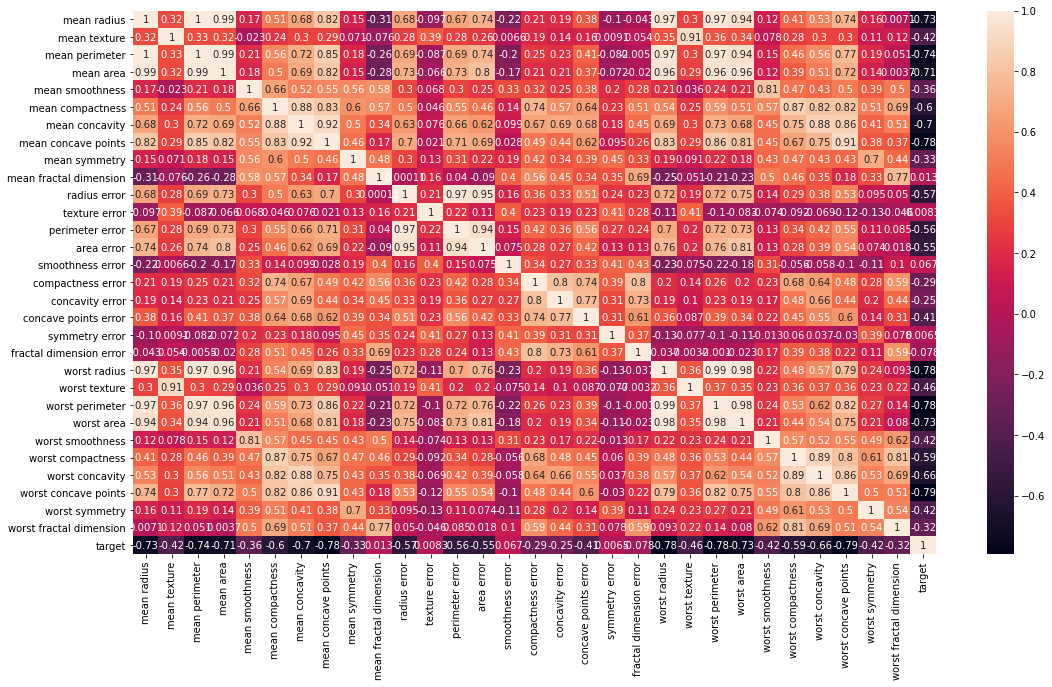

In [57]:
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(), annot = True)

 - We can see that mean radius is highly correlated to mean perimeter & mean area also to worst radius, worst parameter & worst area.

**Creating Test Train Split**

In [58]:
X = data.drop(['target'], axis = 1) # we are dropping our 'target' feature and using all the remaining features in out data frame.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
y = data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 20)

**let us now check the size of out train and test dataset**

In [76]:
print(f'the shape of the train set is {X_train.shape}')
print(f'the shape of the test set is {X_test.shape}')

the shape of the train set is (398, 30)
the shape of the test set is (171, 30)


**Feature Scaling**

In [82]:
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = X_train_max - X_train_min
X_train_scaled = (X_train - X_train_min)/X_train_range

X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = X_test_max - X_test_min
X_test_scaled = (X_test - X_test_min)/X_test_range

X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
435,0.331251,0.319723,0.327068,0.193589,0.529140,0.288080,0.263824,0.321223,0.307576,0.360000,...,0.361651,0.488956,0.372616,0.210700,0.595192,0.361856,0.325000,0.627835,0.383464,0.539333
72,0.483648,0.489273,0.486559,0.333645,0.542523,0.501871,0.396439,0.394831,0.437879,0.346744,...,0.610957,0.571312,0.593873,0.460700,0.576702,0.782014,0.524441,0.652577,0.415301,0.842882
266,0.171281,0.296540,0.176145,0.086139,0.418177,0.292375,0.149649,0.131312,0.435354,0.347674,...,0.156808,0.274611,0.163566,0.073796,0.331044,0.246220,0.153035,0.272371,0.326681,0.222638
468,0.502579,0.448097,0.519729,0.355339,0.369631,0.555242,0.500469,0.498012,0.321212,0.551860,...,0.541485,0.436324,0.546922,0.385549,0.327082,0.495503,0.412540,0.685911,0.174863,0.719966
456,0.220029,0.654325,0.214774,0.115305,0.377905,0.203546,0.167760,0.100249,0.373232,0.272093,...,0.206034,0.707390,0.209109,0.105519,0.458496,0.193068,0.233466,0.234880,0.313376,0.183412


**Now lets train our model on the normalized dataset**

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()

In [86]:
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
y_predict = svc_model.predict(X_test_scaled)

In [91]:
conf_mat = confusion_matrix(y_test,y_predict)

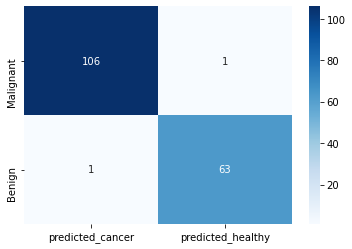

In [95]:
conf_mat = np.array(confusion_matrix(y_test,y_predict,labels = [1,0]))
confusion = pd.DataFrame(conf_mat,index = ['Malignant','Benign'], columns = ['predicted_cancer','predicted_healthy'])
confusion
sns.heatmap(confusion,annot = True,fmt='g',cmap='Blues')